<a href="https://colab.research.google.com/github/gloriastucchi/DeepLearningCourse/blob/main/Week1_232437.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02456 Deep Learning Exercise 1 Pen and Paper

# Contents and why we need this lab

The first lab is all about understanding the mathematical concepts behind neural networks. You will derive everything by hand this first week. The hand-in this week is your modifications to this notebook.

In week two you will program what you have derived this week in  [NumPy](https://numpy.org/) and in week three and onwards you will work in a framework dedicated to making it easy to write deep learning code. In this course we will use [PyTorch](https://pytorch.org/) because it is more Python-like than for example TensorFlow. However, TensorFlow has some advantages if you want to deploy deep learning models. For learning and research PyTorch is right now the preferred framework. But this is a quite dynamic field where a lot is happening, so it is hard to say what is the preferred framework a year from now.    

Linear algebra, probability theory, statistics and optimization are all underpinning deep learning. The availability of coding frameworks for machine learning is to some degree hiding this and making it possible to make quite impressive applications without deep understanding of the underlying mathematical concepts. This is both a blessing and a curse. The ambition of this course is to educate first class deep learners that can develop deep learning solutions tailored to the problem at hand. Therefore we need the fundamental understanding. We have experienced that neglecting the fundamental will always come back to hunt you later when we encounter real world problems. So sharpen your pen and get ready to learn new stuff or more likely refreshen some stuff you forgot you knew years ago. :-)

# List of contents
1. External sources of information
2. Neural networks - the feed-forward model
3. Loss functions and maximum likelihood
4. Stochastic gradient descent
5. Error backpropagation

# External sources of information

1. Book. The notation will to a high degree follow that of [Chris Bishop, Pattern recognition and machine learning](https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book). This book is freely available online and is still a very valuable source of information of all things machine learning.
2. Jupyter notebook. You can find more information about Jupyter notebooks [here](https://jupyter.org/). It will come as part of the [Anaconda](https://www.anaconda.com/) Python installation.
3. Markdown. Jupyter notebook's uses cells. A cell is executed by pressing the Run tab above. In the lab you will only use Markdown cells. You add cell by pressing + tab above of choosing it from the Insert menu also above. A good overview of Markdown formatting can be found [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). For equations Markdown uses [latex](https://en.wikibooks.org/wiki/LaTeX/Mathematics).
4. [Mathematics for machine learning](https://mml-book.github.io/book/mml-book.pdf) is a book that where the title says it all.


# Neural networks - the feed forward model
We will meet different variants of neural network models throughout the course. We need different architectures because they have different type of symmetries that reflect data we encounter with differnt spatial and temporal invariances.

To get started we work with the most basic variant: the so-called *feed-forward neural network* (FFNN). A FFNN with one hidden layer with $M$ hidden unit and two layers of adaptable parameters (weights) denoted by $w=w^{(1)},w^{(2)}$ is plotted below. In literature sometimes $\theta$ will be used instead of $w$.

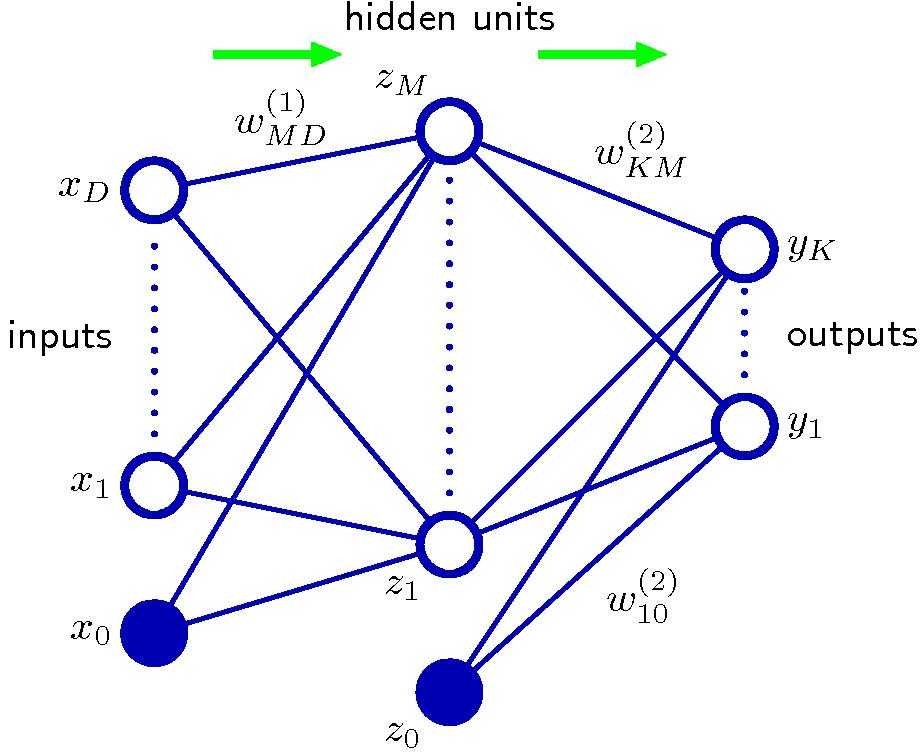

In [ ]:
from IPython.display import Image
root = "https://raw.githubusercontent.com/DeepLearningDTU/02456-deep-learning-with-PyTorch/master/1_Feedforward_Pen_and_Paper/"

# Figure 5.1 from Bishop
Image(root + "figures/Figure5.1.jpg", width=500)

We are considering supervised learning where we both have inputs (covariates) and assocatiated outputs (labels, targets, response variables) available. The network has $D$ inputs: $\mathbf{x}=x_1,\ldots,x_D$ and $K$ outputs $\mathbf{y}=y_1,\ldots,y_K$. The algorithm is called a neural network because the architecture of the model resembles the biological network between neurons in our brains.

This computation is layered. Each layer first computes what is equivalent to the output $a_j$ of a linear statistical model and then applies a non-linear function to the linear model output. For the first layer - which takes the network input $x$ as input - these two steps look like this
$$
\begin{align}
a^{(1)}_j & = \sum_{i=1}^D w^{(1)}_{ji} x_i + w^{(1)}_{j0} \\
z^{(1)}_j & = h_1(a^{(1)}_j ) \ ,
\end{align}
$$
where $h_1$ is the non-linear function in the first layer. We can get rid of writing the so-called bias $w^{(1)}_{j0}$ explicitly by adding an extra input $x_0$ which is always set to one and extending the sum to go from zero:
$$
\begin{align}
a^{(1)}_j & = \sum_{i=0}^D w^{(1)}_{ji} x_i \ .
\end{align}
$$
We will use this notation in the following for all layers and just write for example $\sum_i \ldots$ to be understood as $\sum_{i=0}^D \ldots$.

The second layer takes the output the of the first layer as input:  
$$
a^{(2)}_j = \sum_{i}^M w^{(2)}_{ji} z^{(1)}_i \ .
$$
The second layer non-linear function is denoted by $h_2$ so the output of the network is
$$
y_j = h_2(a^{(2)}_j)
$$
This gives an example of how the neural network model input to output mapping can be specified.

Let us do a few exercise where you complete the equations by replacing $\ldots$ with the correct expressions.

## Exercise a)

a) Write $y_j$ directly as a function of $x$. That is, eliminate the $a$s and $z$s:

$$
y_j = h_2(\ldots)
$$

Answer a)
We can write $y_j$ directly as a function of $x$ iterative substitution:

$$
y_j = h_2(\sum_{l=0}^M w^{(2)}_{jl} ⋅  h_1(\begin{align}
\sum_{i=0}^D w^{(1)}_{li} x_i \  
\end{align}))
$$


## Exercise b)

b) Write the equation for a neural network with two hidden layers and three layers of weights $w=w^{(1)},w^{(2)},w^{(3)}$. Again, without using $a$s and $z$s.
$$
y_j = h_3(\ldots)
$$

Answer b)

$$
y_j = h_3(\sum_{k=0}^M w^{(3)}_{jk} ⋅ h_2(\sum_{l=0}^N w^{(2)}_{kl} ⋅  h_1(\begin{align}
\sum_{i=0}^D w^{(1)}_{li} x_i \  
\end{align})))
$$


## Exercise c)

c) Write the equations for an FFNN with $L$ layers as recursion. Use $l$ as the index for the layer:
$$
\begin{align}
y_j & = \ldots & \\
z^{(l)}_j & = h_l(\ldots) & l=1,\ldots,L \\
a^{(l)}_j & = \ldots &  l=2,\ldots,L \\
a^{(1)}_j & = \ldots &
\end{align}
$$


\\

Answer c)

$$
\begin{align}
y_j & = h_{L}(a_{j}^{L}) & \\
z^{(l)}_j & = h_l(a^{l}_j ) \ \\
a^{(l)}_j & = \sum_{m=0}^M w^{(l)}_{jm} (z_m)^{(l-1)} \ \\
a^{(1)}_j & = \sum_{i=0}^D w^{(1)}_{ji} x_i \ .
\end{align}
$$

## Exercise d) optional

Optional exercises do not give extra credits but are included to give you an opportunity to dive a bit deeper. You can omit them for the first run through the lab and then return to them later on when the other exercises are completed.

d) Do we really need the non-linearities? Show that if we remove the non-linear functions $h_l$ from the expressions above then the output becomes linear in $x$. This means that the model collapses back to the linear model and therefore cannot learn non-linear relations between $x$ and $y$.

# Loss functions and maximum likelihood

The FFNN model is quite flexible and can learn to approximate all sorts of functions from training data. Below are some examples of one-dimensional functions learned with a FFNN - i.e. we  try to learn a function (the neural network) from a set of points $(x,y)$ that can predict $y$ from input $x$ with as high accuracy as possible. The FFNN we use below consists of one hidden layer with three hidden units, $\tanh$ as the non-linear function in the hidden layer and linear output:
$$
y(x) = \sum_{i=0}^3 w^{(2)}_i \tanh( w^{(1)}_i x )
$$
The traning data is visualised as the blue dots, the learned function $y(x)$ (only displayed in the interval where we have training data) is the full red line and the dashed lines are the output from the hidden units.

A very nice website to get intuition about how neural networks fit to data is the [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4&seed=0.48021&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false). The example shown is two dimensional regression: the input $x$ is two-dimensional and the output $y$ is one-dimensional and continuous. Blue encodes high values and yellow low values. You can change many things including switching to classification tasks in the top menu to the right and to other more challenging problems to the left.

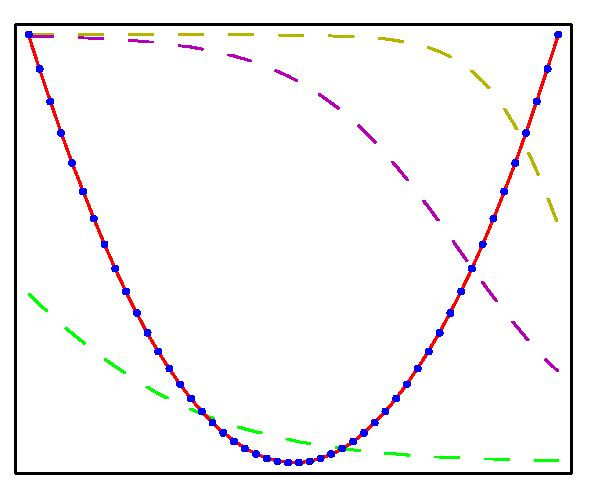

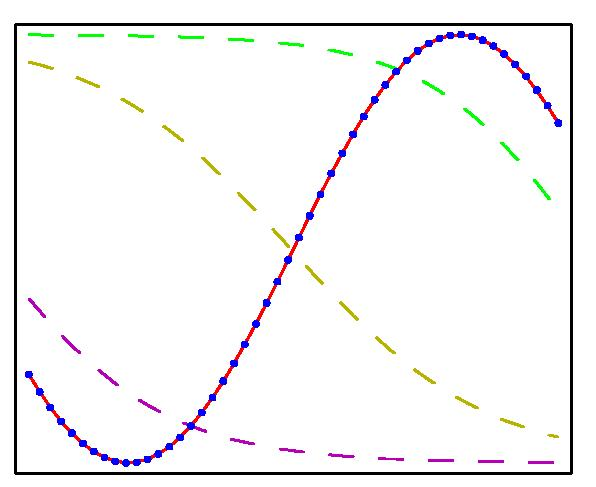

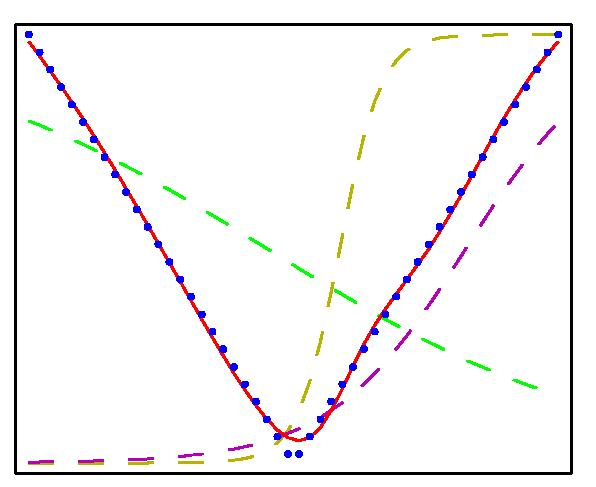

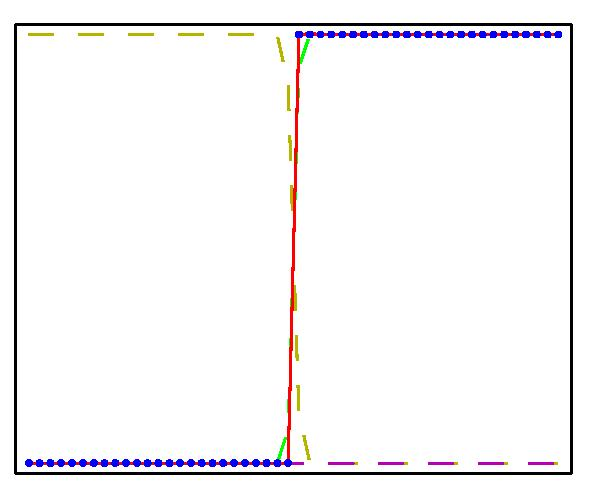

In [ ]:
# Figure 5.3 from Bishop

from IPython.display import display
display(Image(root + "figures/Figure5.3a.jpg",width=400),\
        Image(root + "figures/Figure5.3b.jpg",width=400),\
        Image(root + "figures/Figure5.3c.jpg",width=400),\
        Image(root + "figures/Figure5.3d.jpg",width=400))

This gives some insight into how the neural network uses the hidden units to approximate the curve. But we need to formalise learning and fitting to data. Here the concept of a loss/error function and later on maximum likelihood will come in handy.

The training set $\mathcal{D}=\{ (\mathbf{x}_n,\mathbf{t}_n)|n=1,\ldots,N\}$ is comprised of $N$ input-output pairs. In the plots above these are all the blue dots.

We can define a loss or error function $E(w)$ as some measure of how far $y(x)$ is from the training data, that is the difference between the red line and the blue dots. As above, $w$ denotes the set of weights of the FFNN, which are the parameters of the neural network we are trying to learn - i.e. we wish to determine a set of weights that results in a low value of the loss function. This is the training error as it is only computed for the training points. In literature sometimes $L$ or $J$ will be used instead of $E$.

In machine learning we are very much concerned with what the model predicts for inputs which are not in the training set. We often talk about the generalisation error which measures the loss function on data points sampled randomly from the data distribution. In general we do not know the data distribution so instead we set aside a subset of the data we have - the test set - to compute an estimate of the generalisation error. An important skill to have in machine learning is to perform the optimization of the model in such a way that it generalizes well. Much more about that in the coming weeks...

An example of a loss function is the sum of squares:
$$
E(w) = \sum_{n=1}^N || \mathbf{y}(\mathbf{x}_n) - \mathbf{t}_n||_2^2 \ ,
$$
where $|| \ldots ||_2^2$ is shorthand for the sum of squared components.

This sum of squares error function is appropiate for regression (= targets are continuous) as in the example above. It is not useful for classification where targets are discrete class labels. So in order to come up with a proper loss function for all cases we will appeal to the maximum likelihood. The likelihood is defined as the probability of the data - in supervised learning the target $\mathbf{t}_1,\ldots,\mathbf{t}_N$ - given the model parameters and the inputs:
$$
p(\mathbf{t}_1,\ldots,\mathbf{t}_N|\mathbf{x}_1,\ldots,\mathbf{x}_N,w) \ .
$$
Maximum likelihood simply says that we should use the set of parameters $w$ that assigns the highest possible probability to the observed targets $\mathbf{t}_1,\ldots,\mathbf{t}_N$.

In order to go further from here we need to make some assumptions:

1. Unless we are working with series data - such as time series - we will assume that each data point is independently sampled and each data point is sampled from the same distribution (also known as iid = Independent and identically distributed):
$$
p(\mathbf{t}_1,\ldots,\mathbf{t}_N|\mathbf{x}_1,\ldots,\mathbf{x}_N,w) =
\prod_{n=1}^N p(\mathbf{t}_n|\mathbf{x}_n,w) \ .
$$
2. To connect with the sum of squares loss we will assume that the target can be written as the model output plus some random error $\mathbf{\epsilon}$ and that $\mathbf{\epsilon}$ has a Gaussian distribution with zero mean and covariance $\sigma^2 \mathbf{I}$. This means that targets themselves are Gaussian distributed with mean $\mathbf{y}(\mathbf{x})$ and covariance $\sigma^2 \mathbf{I}$, where $\mathbf{I}$ is the identity matrix. Denoting the Gaussian distribution by $\mathcal{N}$ we can write this as:
$$
p(\mathbf{t}_n|\mathbf{x}_n,w) = \mathcal{N}(\mathbf{t}_n|\mathbf{y}(\mathbf{x}_n),\sigma^2 \mathbf{I}) \ .
$$

## Exercise e)

e) In this exercise you will show that with the two above assumptions we can derive a loss function that contains $E(w)$ as a term. Two hints

1. With the used covariance we can write the Gaussian distribution as
$$
\mathcal{N}(\mathbf{t}_n|\mathbf{y}(\mathbf{x}_n),\sigma^2 \mathbf{I}) = \frac{1}{\sqrt{2\pi \sigma^2}^D}
\exp ( - || \mathbf{y}(\mathbf{x}_n) - \mathbf{t}_n||_2^2 /2\sigma^2 )
$$
2. In order to turn maximum likelihood into a loss/error function apply the (natural) logarithm to the likelihood objective and multiply by minus one.

Show that the loss we get is
$$
\frac{ND}{2} \log 2\pi \sigma^2 + \frac{1}{2\sigma^2} E(w) \ .
$$
Further argue why applying the log and multiplying by minus one is the right thing to do in order to get a loss function. *Hint:* Will the optimum of the likelihood function change if we apply the logarithm?

$$
\begin{align}
    -\log \left( \prod_{n=1}^N\mathcal{N}(\mathbf{t}_n|\mathbf{y}(\mathbf{x}n),\sigma^2 \mathbf{I}) \right)
    &= -\log\left( \prod_{n=1}^N\frac{1}{\sqrt{2\pi \sigma^2}^D}
            e^{ \frac{-|| \mathbf{y}(\mathbf{x}_n) - \mathbf{t}n||^2 }{2\sigma^2} } \right) \\
    &= -\left( \log\left( \prod_{n=1}^N\frac{1}{\sqrt{2\pi \sigma^2}^D} \right)
       + \log \left( \prod_{n=1}^N e^{ \frac{-|| \mathbf{y}(\mathbf{x}_n) - \mathbf{t}n||^2 }{2\sigma^2} } \right) \right) \\
    &= -\left( \sum_{n=1}^N\log\left( \frac{1}{\sqrt{2\pi \sigma^2}^D} \right)
       + \sum_{n=1}^N\log \left( e^{ \frac{-|| \mathbf{y}(\mathbf{x}_n) - \mathbf{t}n||^2 }{2\sigma^2} } \right) \right) \\
    &= - \sum_{n=1}^N\log\left( \frac{1}{\sqrt{2\pi \sigma^2}^D} \right)
       + \sum_{n=1}^N \frac{-|| \mathbf{y}(\mathbf{x}_n) - \mathbf{t}n||^2 }{2\sigma^2} \\
%
    &= - \sum_{n=1}^N \log\left( \sqrt{2\pi \sigma^2}^{-D} \right)
       + \frac{1}{2\sigma^2} \sum_{n=1}^N || \mathbf{y}(\mathbf{x}n) - \mathbf{t}n||^2 \\
%
    &= \sum_{n=1}^N\frac{D}{2}\log\left(2\pi \sigma^2 \right) + \frac{E(w)}{2\sigma^2}  \\
%
    &= \frac{ND}{2}\log\left(2\pi \sigma^2 \right) + \frac{E(w)}{2\sigma^2} \\
\end{align}
$$The use of the logarithm does not change the optimum of the likelihood function, and by applying the natural logarithm, we obtain a simpler term, that is easier to compute.
Themultiplication of minus one turns the problem from a maximisation problem into a minimisation problem.

## Exercise f) optional

f) Show that the optimum (= minimum of the loss) with respect to $w$ is not affected by the value of $\sigma^2$. Find the optimum for $\sigma^2$ as a function of $w$.

This means that for the problem of finding $w$, sum of squares and maximum likelihood for the Gaussian likelihood with $\sigma^2 \mathbf{I}$ covariance are equivalant.  

## Classification, one-hot and softmax

We will now turn to classification. In classication the $K$-dimensional target vector $\mathbf{t}$ encodes exactly one out of $K$ possible classes. It is convenient to use the so-called one-hot encoding for this meaning that the $\mathbf{t}$ vector will have $K-1$ zeros and a single one at position $k$ if the target for the data point is class $k$. For example, if we have $K=4$ and the correct label is class three then $\mathbf{t}=(0,0,1,0)$.

We need to modify the network output $\mathbf{y}(\mathbf{x})$ in order to get a likelihood function. In the example above the likelihood should be the probability that the model assigns to class three. This means that the output should be probabilities. We can achieve this with the softmax function:
$$
y_k = \frac{\exp ( a_k )}{\sum_j \exp ( a_j )} \ ,
$$
where $a_j$ is shorthand for the linear output from the last layer: $a^{(L)}_j$. The $a$ vector is what in statistics is called the multinomial link function and they are also called the logits. Combining the one-hot encoding of the target with the probabilistic model outputs we can write:
$$
p(\mathbf{t}_n|\mathbf{x}_n,w) = \prod_{k=1}^K \left[ y_k(\mathbf{x}_n)\right]^{t_{nk}} \ .
$$
We can now see that the one-hot encoding selects exactly the right output term and the other terms with $t_{nj}=0$ with contribute ones because $[y_{nj}]^0=1$.

## Exercise g)

g) Show using the same procedure we used for regression that the loss function for classification is:
$$
E(w) = - \sum_{n=1}^N \sum_{k=1}^K t_{nk} \log y_{k}(\mathbf{x}_n) \ .
$$
This is also known as the cross entropy loss.

# Stochastic gradient descent

To paraphrase Stan Lee: With great flexibility comes complicated fitting to data! We therefore have to resort to general purpose optimization. Optimization refers to the process of searching for a set of weights $w$ that achieves some good results, such as a low loss on the training set. The loss function is differentiable so we can use gradient information to guide our search. In deep learning some variant of stochastic gradient descent is almost always used for optimization when the gradients can be computed. Stochastic here means that the gradient is computed on a subset of the training set.

Basic gradient descent means that we take a step with step-size $\eta$ opposite the parameter gradient direction:
$$
w^{\mathrm{new}} = w - \eta \nabla E(w) \ ,
$$
where $\nabla$ is the parameter gradient operator. Applying $\nabla$ to a scalar function like $E(w)$ will produce a vector as output where the $j$th component of the vector is the derivative of $E(w)$ with respect to the $j$th parameter. A conceptional sketch of the optimization problem is given in the figure below.  

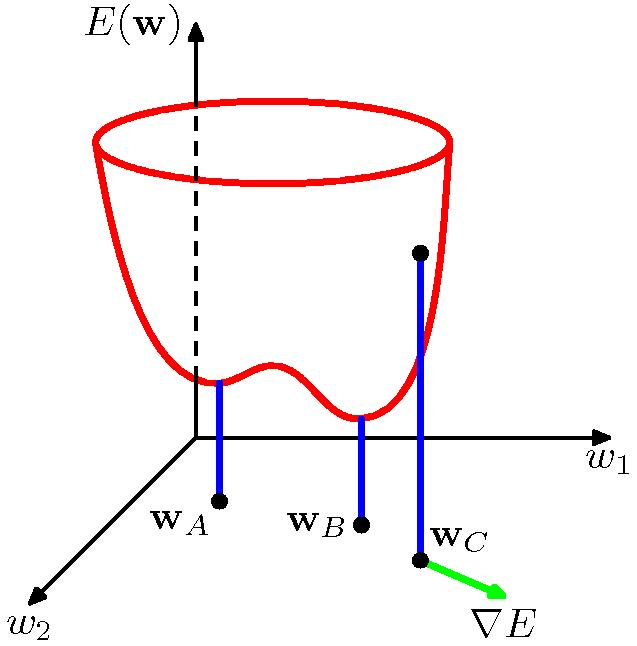

In [ ]:
# Bishop figure 5.5
Image(root + "figures/Figure5.5.jpg",width=500)

## Exercise h) optional
Prove that the gradient calculated on a random subset of the training set on average is proportional to the true gradient.

# Error backpropagation
So-called error backpropagation is simply a recipe for calculating gradients of layered models such as neural networks. Efficient computation is based upon 1) the [chain-rule of differentiation](https://en.wikipedia.org/wiki/Chain_rule):
$$
\frac{\partial f(g(w))}{\partial w} = \left. \frac{\partial f(g)}{\partial g} \right|_{g=g(w)} \frac{\partial g(w)}{\partial w}
$$
and 2) storing intermediate computations. In the following we will omit writing $g=g(w)$ and instead let it be understood from the context.

## Gradient for layer $L$

We return to the FFNN with $L$ layers. We start by computing the gradient with respect to a weight in the last layer:
$$
\frac{\partial E(w)}{\partial w^{(L)}_{ji}} \ .
$$
To make life a bit simpler for ourselves we will assume that our training set consists of one example so we can drop the training point index $n$. (As an optional exercise below you can put the summation over the training examples back in.)

First we observe the $w$ dependence in $E(w)$ is through $a^{(L)}_1,\ldots,a^{(L)}_K$ so we can now apply the chain-rule
$$
\frac{\partial E(w)}{\partial w^{(L)}_{ji}} = \sum_{k=1}^K \frac{\partial E(w)}{\partial a^{(L)}_{k}} \frac{\partial a^{(L)}_{k}}{\partial w^{(L)}_{ji}} \ .
$$
We can use that $a^{(L)}_{k} = \sum_i w^{(L)}_{ki} z^{(L-1)}_i$ to conclude that $\frac{\partial a^{(L)}_{k}}{\partial w^{(L)}_{ji}} = z^{(L-1)}_i$ when $j=k$ and zero otherwise. So we can write
$$
\frac{\partial E(w)}{\partial w^{(L)}_{ji}} = \delta^{(L)}_j  z^{(L-1)}_i \ ,
$$
where we with foresight have defined
$$
\delta^{(L)}_j = \frac{\partial E(w)}{\partial a^{(L)}_{j}} \ .
$$
These $\delta$s will become very practical for bookkeeping purposes.

## Exercise i)
Calculate
$$
\delta^{(L)}_j = \frac{\partial E(w)}{\partial a^{(L)}_{j}}
$$
for classification.

Hint: It is much easier to find the derivative if we write the loss function directly in terms of the logits $a^{(L)}_{j}$. So show first using the definition of the loss and the softmax that
$$
E(w) = - \sum_{k=1}^K t_k a^{(L)}_{k} + \log \sum_{k=1}^K \exp( a^{(L)}_{k} ) \ .
$$
Finally show that
$$
\frac{\partial}{\partial a^{(L)}_{j}} \log \sum_{k=1}^K \exp( a^{(L)}_{k} ) = y_j
$$
to get the final result.

## Gradient for layer $L-1$

Now we proceed to the second last layer
$$
\frac{\partial E(w)}{\partial w^{(L-1)}_{ji}} \ .
$$
This will allow us to identify a pattern that will enable us to generalize to any layer.

We now use that the model is layered so the chain-rule we need is:
$$
\frac{\partial E(w)}{\partial w^{(L-1)}_{ji}} = \sum_{k=1}^K \frac{\partial E(w)}{\partial a^{(L)}_{k}} \frac{\partial a^{(L)}_{k}}{\partial a^{(L-1)}_{j}} \frac{\partial a^{(L-1)}_{j}}{\partial w^{(L-1)}_{ji}} \ .
$$
We can now again use $a^{(L)}_{k} = \sum_i w^{(L)}_{ki} z^{(L-1)}_i= \sum_i w^{(L)}_{ki} h_{L-1}(a^{(L-1)}_i)$ and the definition of $\delta^{(L)}_j$:
$$
\frac{\partial E(w)}{\partial w^{(L-1)}_{ji}} = \sum_{k=1}^K \delta^{(L)}_k  w^{(L)}_{kj} h_{L-1}'(a^{(L-1)}_j) z^{(L-2)}_i \ .
$$
We can now define
$$
\delta^{(L-1)}_j = \sum_{k=1}^K \delta^{(L)}_k  w^{(L)}_{kj} h_{L-1}'(a^{(L-1)}_j) \ .
$$
To write the gradient in the same way as for layer $L$
$$
\frac{\partial E(w)}{\partial w^{(L-1)}_{ji}} = \delta^{(L-1)}_j \ z^{(L-2)}_i \ .
$$
If we look a bit closer at the definition of $\delta^{(L-1)}_j$ we see it is actually nothing but:
$$
\delta^{(L-1)}_j = \frac{\partial E(w)}{\partial a^{(L-1)}_{j}} \ .
$$
You will use this in the next exercise to derive the backpropagation rule for a general layer $l<L$.

## Exercise j) - the backpropagation rule for layer $l<L$

j) Use the above results to argue why the general backpropagation rule for $l<L$ is written as:
$$
\begin{align}
\frac{\partial E(w)}{\partial w^{(l)}_{ji}} & = \delta^{(l)}_j  z^{(l-1)}_i \\
\delta^{(l)}_j & = \sum_{k=1}^K \delta^{(l+1)}_k  w^{(l+1)}_{kj} h_{l}'(a^{(l)}_j)
\end{align}
$$


## Exercise k) - optional
k) Derive the backpropagation rule for regression. That is perform the calculation in exercise i) for the regression loss. Everything else stays the same. Actually it turns out that is you use $h_L(a) = a$ then you even get the same result as in i).


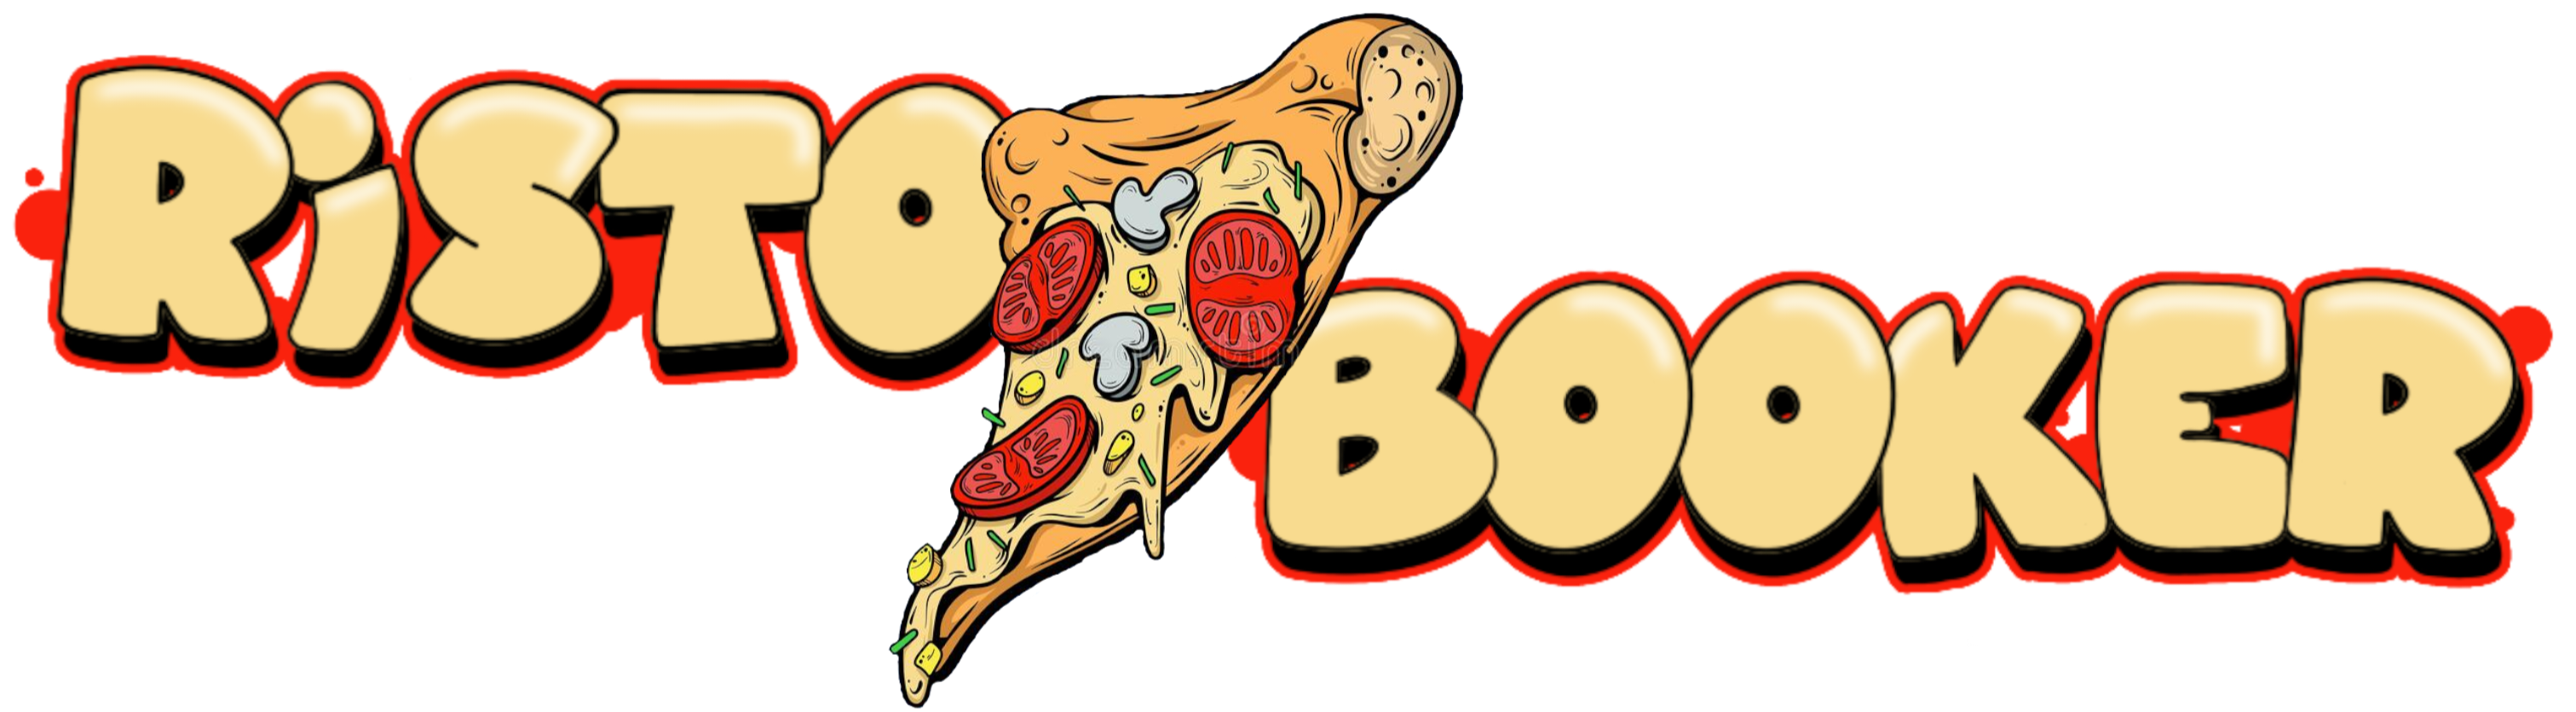

## Exercise l)
l) Modify the backpropagation rules to be able to take a dataset of size greater than one.
Hint: This only requires introducing a sum over $n$ and $n$ indices in a few places.

# Final comments on backpropagation and what is next

So optimizing a feed-forward neural network with gradient descent is pretty straightforward!
1. You forward propagate with the rules you derived in exercise c), storing the results for the $a$s and $z$s.
2. Then you run the backward propagation recursion for the $\delta$s taking $\delta^{(L)}_j$ from exercise i) and using the recursion from exercise j).
3. You get the gradients from the expression in exercise j).
3. Finally you update the weights of the network according to the gradients, and the network should now have better performance on the training set.

If you wonder why the forward recursion for $a$ and $z$ is non-linear and the backward recursion for $\delta$ is linear then remember that the derivative is a [linear operator](https://en.wikipedia.org/wiki/Operator_(mathematics)).

So what comes next? The next two weeks we will stay with the FFNN model. You will implement the forward and backward pass in NumPy yourself next week and in two weeks we will see how we can do this in PyTorch. One of the features of modern algebra frameworks like PyTorch and TensorFlow is that we only need to bother about the forward pass. We have finally "taught" computers to differentiate. ;-)  

In three weeks+ we will look at other generalisations of the FFNN. They all build upon the same principles as for the FFNN so the same insights apply.